In [208]:
#  Before running the code blocks, please ensure that the 3 images are uploaded

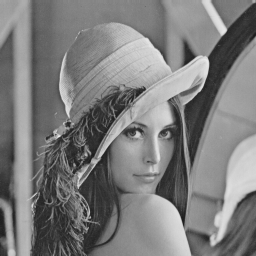

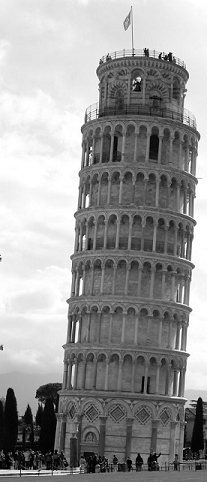

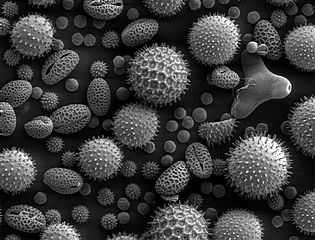

In [209]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
# Loading the images
cells = cv2.imread('cells_scale.png')
lena = cv2.imread('lena_translate.png')
pisa = cv2.imread('pisa_rotate.png')

# Display the images
cv2_imshow(lena)
cv2_imshow(pisa)
cv2_imshow(cells)

## Question 1
* ### Translate the given image ( *lena_translate.png* ) by ($t_x$ = 3.75, $t_y$ = 4.3) pixels.

* $x_t = x_s + 3.75; y_t = y_s + 4.3$
* $x_s = x_t - 3.75; y_s = y_t - 4.3$
* Pixels out of range is left blank
* Bilinear interpolation is used

In [210]:
# function to translate the image by a given amount

def translate(image,tx,ty):
  # finding the image height and width
  height, width, _ = image.shape
  # creating a blank image for target
  image_target = np.zeros((height, width), dtype=np.uint8)

  # iterating over pixels
  # xt : taget x coordinate
  # yt : taget y coordinate
  # xs : source x coordinate
  # ys : source y coordinate
  for xt in range(width):
    for yt in range(height):
      # sourse pixel coordinates corresponding to the target coordinates.
      xs = xt - tx
      ys = yt - ty
      # floor values of source pixel coordinates
      xs_f = int(np.floor(xs))
      ys_f = int(np.floor(ys))
      # a,b used for bilnear interpolation
      a = xs - xs_f
      b = ys - ys_f

      # Source to target mapping using bilinear interpolation
      if (xs_f < (width)) & (ys_f <(height)) & (xs_f > tx) & (ys_f > ty): # update only if sourse pixels falls within the range else remains as blank
        image_target[yt,xt] = (1-a)*(1-b)*lena[ys_f ,xs_f,0] + (1-a)*(b)*lena[ys_f+1,xs_f,0] + a*(1-b)*lena[ys_f,xs_f+1,0] + (a*b)*lena[ys_f+1,xs_f+1,0]
  # displaying the target image
  cv2_imshow(image_target)


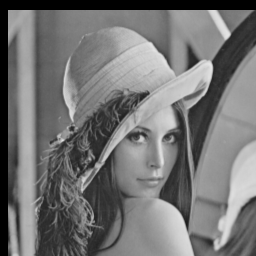

In [211]:
# translating by tx = 3.75 and ty = 4.3 pixels
translate(lena,3.75,4.3)

## Question 2
* ### Rotate the given image (*pisa_rotate.png*) about the image centre, so as to straighten the Pisa tower.
* $x_t = x_s*cos(\theta) + y_s*sin(\theta); y_t = -x_s*sin(\theta) + y_s*cos(\theta)$
* On Rewriting :  $x_s = x_t*cos(\theta) - y_t*sin(\theta); y_s = x_t*sin(\theta) + y_t*cos(\theta)$
* Before rotating, the origin is shifted to the centre.
* Pixels out of range is left blank
* Bilinear interpolation is used

In [212]:
# function to rotate the image by a given angle

def rotate(image,angle_deg):
  # finding the image height and width
  height, width, _ = image.shape
  # creating a blank image for target
  image_target = np.zeros((height, width), dtype=np.uint8)

  # converting the angle to be rotated into radians
  theta = np.deg2rad(angle_deg)

  # iterating over pixels
  for xt in range(width):
    for yt in range(height):
      # sourse pixel coordinates corresponding to the target coordinates.
      xs = (xt - (width/2)) * np.cos(theta) - (yt - (height/2)) * np.sin(theta)  # After shifting origin to centre
      ys = (xt - (width/2)) *np.sin(theta) +  (yt - (height/2)) * np.cos(theta)
      # floor values of sourse pixel coordinates
      xs_f = int(np.floor(xs))
      ys_f = int(np.floor(ys))
      # a,b used for bilnear interpolation
      a = xs - xs_f
      b = ys - ys_f

      # Sourse to target mapping using bilinear interpolation
      if (xs_f < (width/2)-1) & (ys_f < (height/2)-1) & (xs_f > -(width/2)) & (ys_f > -(height/2)): # update only if sourse pixels falls within the range else remains as blank
        image_target[yt,xt] = (1-a)*(1-b)*image[ys_f + int(height/2),xs_f+int(width/2),0] + (1-a)*(b)*image[ys_f+1+int(height/2),xs_f+int(width/2),0] + a*(1-b)*image[ys_f+int(height/2),xs_f+1+int(width/2),0] + (a*b)*image[ys_f+1+int(height/2),xs_f+1+int(width/2),0]
  # displaying the target image
  cv2_imshow(image_target)


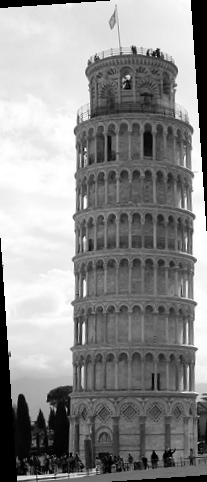

In [213]:
# rotating the pisa tower by 3.9 degrees anti-clockwise
rotate(pisa,3.9)

#### Pisa tower straightened up by rotating by **3.9 degrees** anti-clockwise

## Question 3
* ### Scale the given image (*cells_scale.png*) by 0.8 and 1.3 factors.
* $x_t = a * x_s; y_t = b * y_s$
* $x_s = x_t/a; y_s = y_t/b$
* Before scaling, the origin is shifted to the centre.
* Pixels out of range is left blank
* Bilinear interpolation is used

In [214]:
# function for scaling of images.
# both uniform and non uniform scaling possible depending on the chosen values of a and b

def scale(image,scales):
  # finding the image height and width
  height, width, _ = image.shape
  # creating a blank image for target
  image_target = np.zeros((height, width), dtype=np.uint8)

  # iterating over pixels
  for xt in range(width):
    for yt in range(height):
      # sourse pixel coordinates corresponding to the target coordinates.
      xs = (xt - (width/2)) / scales[0]   # After shifting origin to centre
      ys = (yt - (height/2)) / scales[1]
      # floor values of sourse pixel coordinate
      xs_f = int(np.floor(xs))
      ys_f = int(np.floor(ys))
      # a,b used for bilnear interpolation
      a = xs - xs_f
      b = ys - ys_f

      # updating the intensities of target using bilinear interpolation
      if (xs_f < (width/2)-1) & (ys_f < (height/2)-1) & (xs_f > -(width/2)) & (ys_f > -(height/2)): # update only if sourse pixels falls within the range else remains as blank
        image_target[yt,xt] = (1-a)*(1-b)*image[ys_f + int(height/2),xs_f+int(width/2),0] + (1-a)*(b)*image[ys_f+1+int(height/2),xs_f+int(width/2),0] + a*(1-b)*image[ys_f+int(height/2),xs_f+1+int(width/2),0] + (a*b)*image[ys_f+1+int(height/2),xs_f+1+int(width/2),0]
  # displaying the target image
  cv2_imshow(image_target)


Uniform scaling a = 0.8, b = 0.8


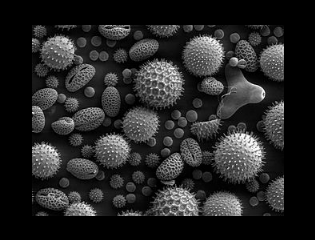


Uniform scaling a = 1.3, b = 1.3


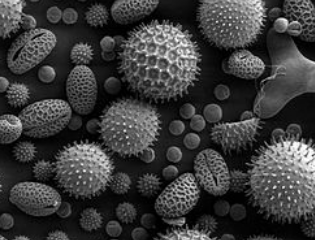


Non-uniform scaling a = 0.8, b = 1.3


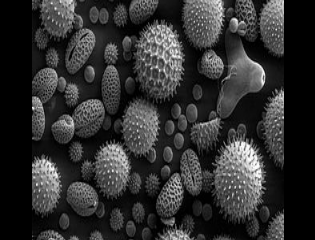

In [215]:
# displaying the image for both uniform and non uniform scaling for the values given in question
print("Uniform scaling a = 0.8, b = 0.8")
scale(cells,[0.8,0.8]) # a = 0.8, b = 0.8
print("\nUniform scaling a = 1.3, b = 1.3")
scale(cells,[1.3,1.3]) # a = 1.3, b = 1.3
print("\nNon-uniform scaling a = 0.8, b = 1.3")
scale(cells,[0.8,1.3]) # a = 0.8, b = 1.3

Output is shown for both unifirm and non-uniform scaling


*   Scaling value  <1 : image shrinks
*   Scaling value  >1 : image expands

